In [1]:
import gzip
import pickle
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LogNorm

In [2]:
inputs_file = '/Users/luisfelipe/Downloads/inputs_geant4.pkl'
with gzip.open(inputs_file, 'rb') as f:
    inputs = pickle.load(f)
px_input,py_input,pz_input,x_input,y_input,z_input,pdg_input = inputs.T

outputs_file = '/Users/luisfelipe/Downloads/outputs_geant4.pkl'
with gzip.open(outputs_file, 'rb') as f:
    outputs = pickle.load(f)
px,py,pz,x,y,z,pdg = outputs.T


In [3]:
pt_input = np.sqrt(px_input**2+py_input**2)
P_input = np.sqrt(pt_input**2+pz_input**2)

pt = np.sqrt(px**2+py**2)
P = np.sqrt(pt**2+pz**2)



In [4]:
def propagate_to_sensitive_plane(sensitive_plane,px,py,pz,x,y,z):
    z += sensitive_plane
    x += sensitive_plane*px/pz
    y += sensitive_plane*py/pz
    return x,y,z

In [5]:
#x,y,z = propagate_to_sensitive_plane(57,px,py,pz,x,y,z)

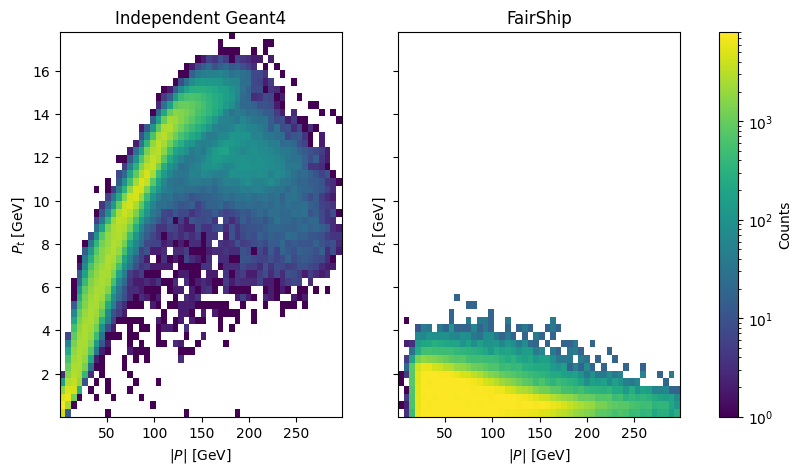

In [6]:
fig,axes = plt.subplots(1,2,figsize=(10, 5), sharey = True,sharex=True)
h1, xedges, yedges, im1 = axes[0].hist2d(P, pt, bins=50, cmap='viridis', norm=LogNorm())
axes[0].set_xlabel('$|P|$ [GeV]')
axes[0].set_ylabel('$P_t$ [GeV]')
axes[0].set_title('Independent Geant4')

axes[1].hist2d(P_input, pt_input, bins=[xedges, yedges], cmap='viridis', norm=LogNorm())
axes[1].set_xlabel('$|P|$ [GeV]')
axes[1].set_ylabel('$P_t$ [GeV]')
axes[1].set_title('FairShip')


fig.colorbar(im1, ax=axes,label='Counts')
plt.show()

In [7]:
mask_x = np.logical_and(x<3, x>-3)
mask_y = np.logical_and(y<5,y>-5)
mask = np.logical_and(mask_x,mask_y)

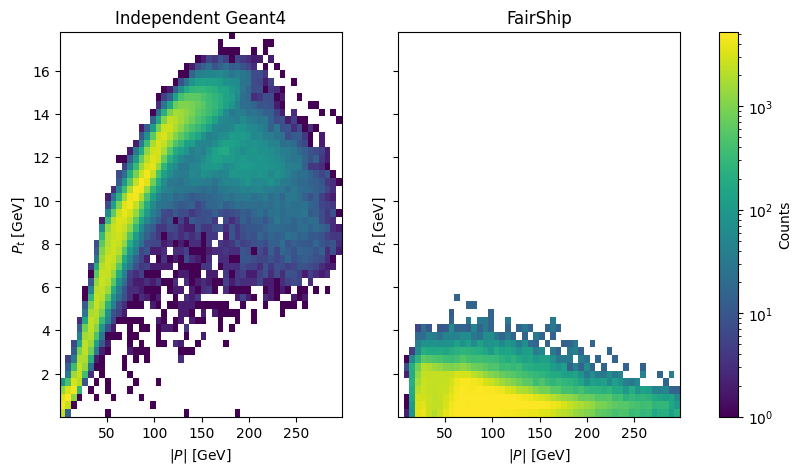

In [8]:
fig,axes = plt.subplots(1,2,figsize=(10, 5), sharey = True,sharex=True)
h1, xedges, yedges, im1 = axes[0].hist2d(P[mask], pt[mask], bins=50, cmap='viridis', norm=LogNorm())
axes[0].set_xlabel('$|P|$ [GeV]')
axes[0].set_ylabel('$P_t$ [GeV]')
axes[0].set_title('Independent Geant4')

axes[1].hist2d(P_input[mask], pt_input[mask], bins=[xedges, yedges], cmap='viridis', norm=LogNorm())
axes[1].set_xlabel('$|P|$ [GeV]')
axes[1].set_ylabel('$P_t$ [GeV]')
axes[1].set_title('FairShip')


fig.colorbar(im1, ax=axes,label='Counts')
plt.show()

In [9]:
def muon_loss(x,y,particle):
    charge = -1*np.sign(particle)
    mask = (-charge*x <= 2.6) & (-3 <= -charge*x) & (np.abs(y) <= 5)
    x = x[mask]
    charge = charge[mask]
    return np.sqrt(1 + (charge*x-3)/(2.6+3))


In [10]:
muon_loss(x,y,pdg).sum()

np.float64(85179.1367691885)

In [11]:
z_input

array([-5.49, -5.49, -5.49, ..., -5.49, -5.49, -5.49])

In [12]:
z

array([18.305, 18.305, 18.305, ..., 18.305, 18.305, 18.305])

In [13]:
z-z_input

array([23.795, 23.795, 23.795, ..., 23.795, 23.795, 23.795])